## Selections Bias(Detecting Fake Patterns )


When you select or analyze data in way that makes your conclusion misleading-
often without realealizing

lets try>> "Player with more yellow cards(CrdY) score fewer goals". 

- Reality check: Stratify by position- defender get more cards but naturally score less.

In [1]:
#loading dataset
import pandas as pd
dataset=pd.read_csv('premier-player-23-24.csv')
dataset.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [3]:
#drop missing value
data =dataset[['CrdY','Gls','Pos']].dropna()

#group by position and calculate averages
position_avg=data.groupby('Pos')[['CrdY','Gls']].mean().round(2)

print(position_avg)

       CrdY   Gls
Pos              
DF     3.36  0.90
DF,FW  0.67  0.00
DF,MF  2.82  0.50
FW     2.11  4.86
FW,DF  1.20  2.00
FW,MF  2.42  4.20
GK     1.50  0.00
MF     3.74  1.42
MF,DF  2.72  0.72
MF,FW  2.69  2.86


In [5]:
#check overall relationship(not by player position)

low_cards=data[data['CrdY'] <=2]['Gls'].mean()
high_cards=data[data['CrdY']>2]['Gls'].mean()

print(f'Avg Goals with e-2 Yellow Cards:{low_cards:.2f}')
print(f'Avg Goals with >2 Yellow Cards:{high_cards:.2f}')


Avg Goals with e-2 Yellow Cards:1.42
Avg Goals with >2 Yellow Cards:2.94


## Interpretation:

The analysis suggests that players with more than 2 yellow cards score more goals on average, which seems counterintuitive. The key insight is that position matters: defenders, who get more yellow cards, tend to score fewer goals, while attackers score more but accumulate fewer yellow cards. Stratifying by position reveals the true relationship, highlighting the importance of considering such factors to avoid misleading conclusions

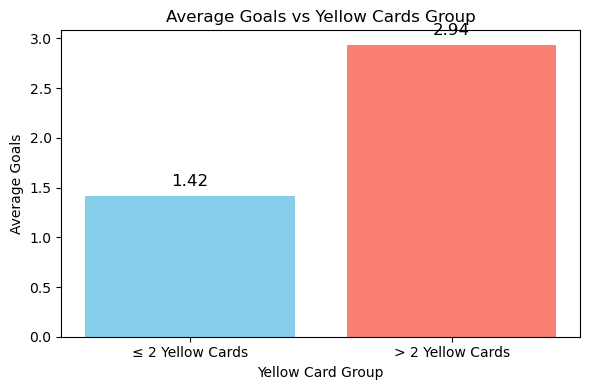

In [7]:
import matplotlib.pyplot as plt


# Data for bar plot
groups = ['≤ 2 Yellow Cards', '> 2 Yellow Cards']
averages = [low_cards, high_cards]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(groups, averages, color=['skyblue', 'salmon'])

# Add labels
plt.title('Average Goals vs Yellow Cards Group')
plt.ylabel('Average Goals')
plt.xlabel('Yellow Card Group')

# Add value labels on top
for i, val in enumerate(averages):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('C:/project/draft/Statistics_Project/Sampling_Bias_and_Mean_Reversion_in_Football_Analytics/visuals/Selection_Bias.png')
plt.show()

